In [34]:
import numpy
import scipy.special
import matplotlib.pyplot


In [55]:
class NeuralNetwork:
    # 신경망초기화하기
    def __init__(self,inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes,-0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes,-0.5), (self.onodes, self.hnodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
        
    # 신경망학습시키기
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
    # 신경망에질의하기
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    



In [63]:
import time

input_nodes = 784 #28*28 MNIST가 가로세로 28개라 인풋노드가 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.2

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open('mnist_train.csv','r')
training_data_list = training_data_file.readlines()
training_data_file.close()

start_time = time.time()

epoches = 2

for e in range(epoches):
    
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs,targets)
        
print("start_time",start_time)
print("---%s seconds ---" % (time.time() - start_time))

start_time 1523946208.2137394
---136.37320065498352 seconds ---


In [80]:
%matplotlib inline

test_data_file = open('mnist_test.csv','r')
test_data_list = test_data_file.readlines()
test_data_file.close()

all_values = test_data_list[0].split(',')

n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])    
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    
    label = numpy.argmax(outputs)
    
    if(label == correct_label):
        scorecard.append(1)
        
    else:
        scorecard.append(0)
        
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9613


0.01
0.83283365
[4.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01   

C:\Users\E7035\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


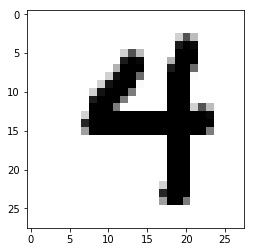

In [88]:
import scipy.misc
# import imageio

our_own_dataset = []

img_array = scipy.misc.imread('4.png', flatten=True)

img_data = 255.0 - img_array.reshape(784)

img_data = (img_data / 255.0 * 0.99) + 0.01
print(numpy.min(img_data))
print(numpy.max(img_data))

record = numpy.append(4,img_data)
our_own_dataset.append(record)

print(record)
#여기까지 데이터 전처리

item = 0

#plot 이미지
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28),cmap='Greys', interpolation='None')

#정답은 첫번째 밸류
correct_label = our_own_dataset[item][0]
#인풋은 나머지
inputs = our_own_dataset[item][1:]

outputs = n.query(inputs)
print(outputs)

label = numpy.argmax(outputs)
print("network says ", label)
if(label == correct_label):
    print("matched")
else:
    print("not matched")